In [5]:
# Importing Required Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [6]:
# Importing Required Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

###  Combining all the Files and Loading as One

In [9]:
# Listing Files
path = 'csse_covid_19_daily_reports_us\\'
files = os.listdir(path)
files

['04-12-2020.csv',
 '04-13-2020.csv',
 '04-14-2020.csv',
 '04-15-2020.csv',
 '04-16-2020.csv',
 '04-17-2020.csv',
 '04-18-2020.csv',
 '04-19-2020.csv',
 '04-20-2020.csv',
 '04-21-2020.csv',
 '04-22-2020.csv',
 '04-23-2020.csv',
 '04-24-2020.csv',
 '04-25-2020.csv',
 '04-26-2020.csv',
 '04-27-2020.csv',
 '04-28-2020.csv',
 '04-29-2020.csv',
 '04-30-2020.csv',
 '05-01-2020.csv',
 '05-02-2020.csv',
 '05-03-2020.csv',
 '05-04-2020.csv',
 '05-05-2020.csv',
 '05-06-2020.csv',
 '05-07-2020.csv',
 '05-08-2020.csv',
 '05-09-2020.csv',
 '05-10-2020.csv',
 '05-11-2020.csv',
 '05-12-2020.csv',
 '05-13-2020.csv',
 '05-14-2020.csv',
 '05-15-2020.csv',
 '05-16-2020.csv',
 '05-17-2020.csv',
 '05-18-2020.csv',
 '05-19-2020.csv',
 '05-20-2020.csv',
 '05-21-2020.csv',
 '05-22-2020.csv',
 '05-23-2020.csv',
 '05-24-2020.csv',
 '05-25-2020.csv',
 '05-26-2020.csv',
 '05-27-2020.csv',
 '05-28-2020.csv',
 '05-29-2020.csv',
 '05-30-2020.csv',
 '05-31-2020.csv',
 '06-01-2020.csv',
 '06-02-2020.csv',
 '06-03-2020

In [10]:
# Picking out csv files
files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['04-12-2020.csv',
 '04-13-2020.csv',
 '04-14-2020.csv',
 '04-15-2020.csv',
 '04-16-2020.csv',
 '04-17-2020.csv',
 '04-18-2020.csv',
 '04-19-2020.csv',
 '04-20-2020.csv',
 '04-21-2020.csv',
 '04-22-2020.csv',
 '04-23-2020.csv',
 '04-24-2020.csv',
 '04-25-2020.csv',
 '04-26-2020.csv',
 '04-27-2020.csv',
 '04-28-2020.csv',
 '04-29-2020.csv',
 '04-30-2020.csv',
 '05-01-2020.csv',
 '05-02-2020.csv',
 '05-03-2020.csv',
 '05-04-2020.csv',
 '05-05-2020.csv',
 '05-06-2020.csv',
 '05-07-2020.csv',
 '05-08-2020.csv',
 '05-09-2020.csv',
 '05-10-2020.csv',
 '05-11-2020.csv',
 '05-12-2020.csv',
 '05-13-2020.csv',
 '05-14-2020.csv',
 '05-15-2020.csv',
 '05-16-2020.csv',
 '05-17-2020.csv',
 '05-18-2020.csv',
 '05-19-2020.csv',
 '05-20-2020.csv',
 '05-21-2020.csv',
 '05-22-2020.csv',
 '05-23-2020.csv',
 '05-24-2020.csv',
 '05-25-2020.csv',
 '05-26-2020.csv',
 '05-27-2020.csv',
 '05-28-2020.csv',
 '05-29-2020.csv',
 '05-30-2020.csv',
 '05-31-2020.csv',
 '06-01-2020.csv',
 '06-02-2020.csv',
 '06-03-2020

In [11]:
# Initializing empty dataframe
df = pd.DataFrame()

In [16]:
# Loop over list of files to append to empty dataframe:
for f in files_csv:
    data = pd.read_csv('csse_covid_19_daily_reports_us\\'+f)
    df = df.append(data)

In [18]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945,NaN,NaN
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059,NaN,NaN
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN,NaN,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250,NaN,NaN
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176,NaN,NaN


In [19]:
df.shape

(15330, 20)

In [20]:
df.isnull().any()   

Province_State          False
Country_Region          False
Last_Update              True
Lat                      True
Long_                    True
Confirmed               False
Deaths                  False
Recovered                True
Active                   True
FIPS                     True
Incident_Rate            True
People_Tested            True
People_Hospitalized      True
Mortality_Rate           True
UID                     False
ISO3                    False
Testing_Rate             True
Hospitalization_Rate     True
Total_Test_Results       True
Case_Fatality_Ratio      True
dtype: bool

In [21]:
df.isnull().sum()

Province_State              0
Country_Region              0
Last_Update                19
Lat                       546
Long_                     546
Confirmed                   0
Deaths                      0
Recovered                3024
Active                     17
FIPS                       19
Incident_Rate             546
People_Tested            3514
People_Hospitalized     10201
Mortality_Rate           3303
UID                         0
ISO3                        0
Testing_Rate              546
Hospitalization_Rate    10201
Total_Test_Results      12362
Case_Fatality_Ratio     12309
dtype: int64

In [24]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945,NaN,NaN
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059,NaN,NaN
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN,NaN,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250,NaN,NaN
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Virginia,US,2021-01-01 05:30:27,37.7693,-78.1700,349584,5032,30707.0,313845.0,51.0,4095.638473,NaN,NaN,NaN,84000051.0,USA,49862.123205,NaN,4255991.0,1.439425
54,Washington,US,2021-01-01 05:30:27,47.4009,-121.4905,246752,3461,NaN,243291.0,53.0,3240.386963,NaN,NaN,NaN,84000053.0,USA,49972.993711,NaN,3805390.0,1.402623
55,West Virginia,US,2021-01-01 05:30:27,38.4912,-80.9545,85334,1338,59508.0,24488.0,54.0,4761.551368,NaN,NaN,NaN,84000054.0,USA,84508.692646,NaN,1514520.0,1.567957
56,Wisconsin,US,2021-01-01 05:30:27,44.2685,-89.6165,520438,5242,447500.0,67696.0,55.0,8938.495481,NaN,NaN,NaN,84000055.0,USA,91860.002192,NaN,5348488.0,1.007229


In [25]:
# Obtaining type,unique value,nan percent for columns with nan values
nan_columns = []
for col in df.columns:
    if df[col].isna().sum() > 0.0:
        nan_columns.append(col)
        print('dtype={1} uniques={2} nans_percent={3} {0}'.format(col,df[col].dtype, len(df[col].unique()), 100*df[col].isna().sum()/df.shape[0]))

dtype=object uniques=267 nans_percent=0.12393998695368558 Last_Update
dtype=float64 uniques=59 nans_percent=3.5616438356164384 Lat
dtype=float64 uniques=59 nans_percent=3.5616438356164384 Long_
dtype=float64 uniques=8071 nans_percent=19.726027397260275 Recovered
dtype=float64 uniques=11894 nans_percent=0.11089367253750815 Active
dtype=float64 uniques=61 nans_percent=0.12393998695368558 FIPS
dtype=float64 uniques=13647 nans_percent=3.5616438356164384 Incident_Rate
dtype=float64 uniques=10939 nans_percent=22.922374429223744 People_Tested
dtype=float64 uniques=3158 nans_percent=66.54272667971298 People_Hospitalized
dtype=float64 uniques=10846 nans_percent=21.545988258317024 Mortality_Rate
dtype=float64 uniques=13676 nans_percent=3.5616438356164384 Testing_Rate
dtype=float64 uniques=4963 nans_percent=66.54272667971298 Hospitalization_Rate
dtype=float64 uniques=2677 nans_percent=80.6392694063927 Total_Test_Results
dtype=float64 uniques=2718 nans_percent=80.293542074364 Case_Fatality_Ratio


In [26]:
# Dropping columns with more than 60% nan values
df_dropped = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1) 
df_dropped.shape

(15330, 16)

In [27]:
df.shape

(15330, 20)

In [28]:
df_dropped.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate'],
      dtype='object')

In [29]:
df_dropped.nunique()

Province_State       59
Country_Region        1
Last_Update         266
Lat                  58
Long_                58
Confirmed         12955
Deaths             5821
Recovered          8070
Active            11893
FIPS                 60
Incident_Rate     13646
People_Tested     10938
Mortality_Rate    10845
UID                  59
ISO3                  6
Testing_Rate      13675
dtype: int64

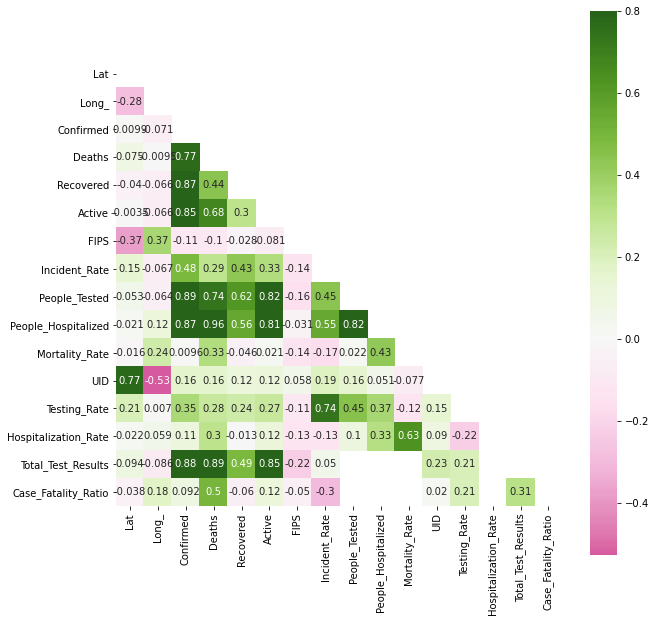

In [30]:
corrmat = df.corr()   # Corelation Matrix
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

There are strong co-relation between some variables hence making some variables redundant

In [32]:
#Function to plot Pie Chart
def dict_2_pie_chart(data):
    labels = []
    sizes = []

    for x, y in data.items():
        labels.append(x)
        sizes.append(y)
    plt.figure(figsize=(20, 20))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.show()

In [34]:
new_df = df.groupby(['Province_State']).sum().reset_index()  #Grouping the Data by Province State

<Figure size 1440x1440 with 0 Axes>

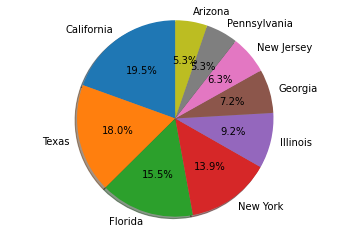

,Province_State,Confirmed
5,California,173971829
50,Texas,160304457
11,Florida,137941068
36,New York,123786141
17,Illinois,81698626
12,Georgia,64458775
34,New Jersey,56515883
43,Pennsylvania,47103519
3,Arizona,47038197


In [38]:
dict_2_pie_chart(dict(new_df[['Province_State','Confirmed']].sort_values(by=['Confirmed'], ascending= [False])[:9].values))
new_df[['Province_State','Confirmed']].sort_values(by=['Confirmed'], ascending= [False])[:9] 

California has the Highest number of confirmed cases

<Figure size 1440x1440 with 0 Axes>

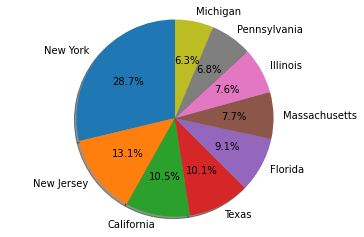

,Province_State,Deaths
36,New York,8325191
34,New Jersey,3804455
5,California,3054797
50,Texas,2925136
11,Florida,2629026
25,Massachusetts,2217565
17,Illinois,2197017
43,Pennsylvania,1981957
26,Michigan,1827565


In [39]:
dict_2_pie_chart(dict(new_df[['Province_State','Deaths']].sort_values(by=['Deaths'], ascending= [False])[:9].values))
new_df[['Province_State','Deaths']].sort_values(by=['Deaths'], ascending= [False])[:9] 

New York has the highest number of Deaths even though it has less number of confirmed cases than California

<Figure size 1440x1440 with 0 Axes>

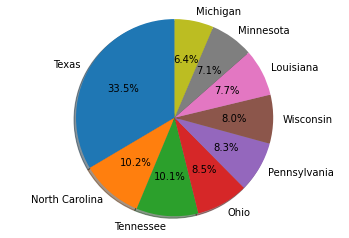

,Province_State,Recovered
50,Texas,123565589.0
37,North Carolina,37674462.0
49,Tennessee,37415138.0
40,Ohio,31507780.0
43,Pennsylvania,30762504.0
57,Wisconsin,29502768.0
22,Louisiana,28514424.0
27,Minnesota,26193675.0
26,Michigan,23620880.0


In [40]:
dict_2_pie_chart(dict(new_df[['Province_State','Recovered']].sort_values(by=['Recovered'], ascending= [False])[:9].values))
new_df[['Province_State','Recovered']].sort_values(by=['Recovered'], ascending= [False])[:9] 

The Highest number of Recovered cases are in Texas even though California has highest number of confirmed cases